In [1]:
import numpy as np
import pandas as pd
import lbsa
import os 
import math
import torch

import warnings
warnings.simplefilter("ignore", UserWarning)

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
device = get_default_device()
device

device(type='cuda')

In [2]:
train_df = pd.read_csv("Corona_NLP_train.csv", encoding='latin-1')
test_df = pd.read_csv("Corona_NLP_test.csv", encoding='latin-1')

In [3]:
os.getcwd().replace("\\", "/")

'E:/Aalto/Aalto Master 1st Spring 2022/DSB2/Assignment 4'

In [4]:
sa_lexicon = lbsa.get_lexicon("sa", language = "english", source = "nrc", 
                              path = "E:/Aalto/Aalto Master 1st Spring 2022/DSB2/Assignment 4/Lexicon-Based-Sentiment-Analysis/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-v0.92-In105Languages-Nov2017Translations.xlsx")

In [5]:
sa_lexicon.dataframe

,unnamed: 0,english,afrikaans,albanian,amharic,arabic,armenian,azeerbaijani,basque,belarusian,...,yoruba,zulu,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,0,aback,uit die veld geslaan,prapa,ተጭኗል,الى الوراء,շեղում,sanki,aback,ззаду,...,aback,back,0,0,0,0,0,0,0,0
1,1,abacus,abakus,numërator,abacus,طبلية تاج,անբավարարություն,abacus,abako,абака,...,abacus,Abacus,0,0,0,0,0,0,0,1
2,2,abandon,verlaat,braktis,ውጣ,تخلى,լքել,tərk et,bertan behera,адмовіцца ад,...,kọ silẹ,shiya,0,0,0,1,0,1,0,0
3,3,abandoned,verlate,braktisur,ተትቷል,مهجور,լքված,tərk etdi,abandonatutako,закінуты,...,abandoned,ishiyiwe,1,0,0,1,0,1,0,0
4,4,abandonment,verlating,braktisje,ማቋረጥ,التخلي عن,հրաժարվելով,ləğv,abandono,пакіданне,...,abandonment,ukushiya,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14177,14177,zone,sone,zonë,ዞን,منطقة,գոտի,zona,zona,зона,...,ibi kan,indawo,0,0,0,0,0,0,0,0
14178,14178,zoo,dieretuin,kopsht zoologjik,መናፈሻ,حديقة حيوان,գազանանոց,zoo,zoologiko,заапарк,...,Ile ifihan oniruuru ẹranko,i-zoo,0,0,0,0,0,0,0,0
14179,14179,zoological,dierkundige,zoologjik,ዞኦሎጂካል,حيواني,կենդանաբանական,zooloji,zoologiko,заалагічны,...,zoological,zoological,0,0,0,0,0,0,0,0
14180,14180,zoology,dierkunde,zoologji,ዞኦሎጂ,علم الحيوان,կենդանաբանություն,zooloji,zoology,заалогія,...,Ẹkọ,i-zoology,0,0,0,0,0,0,0,0


In [6]:
sa_lexicon.dataframe[["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]].sum(axis=0)

anger           1247
anticipation     839
disgust         1058
fear            1476
joy              689
sadness         1191
surprise         534
trust           1231
dtype: int64

In [7]:
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


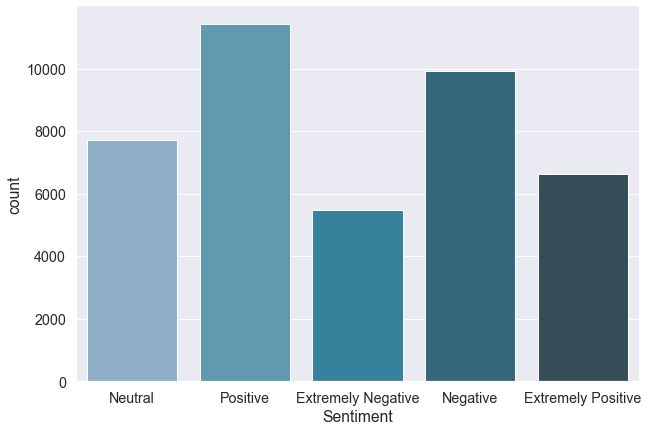

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="darkgrid")
sns.set(font_scale=1.3)

target_dist = sns.catplot(x='Sentiment', data=train_df, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show()

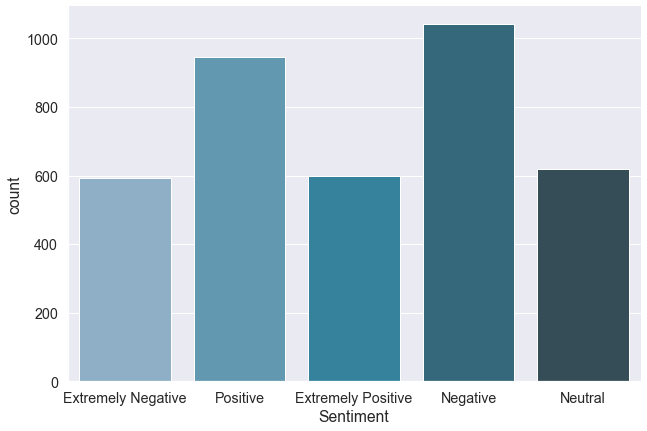

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="darkgrid")
sns.set(font_scale=1.3)

target_dist = sns.catplot(x='Sentiment', data=test_df, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show()


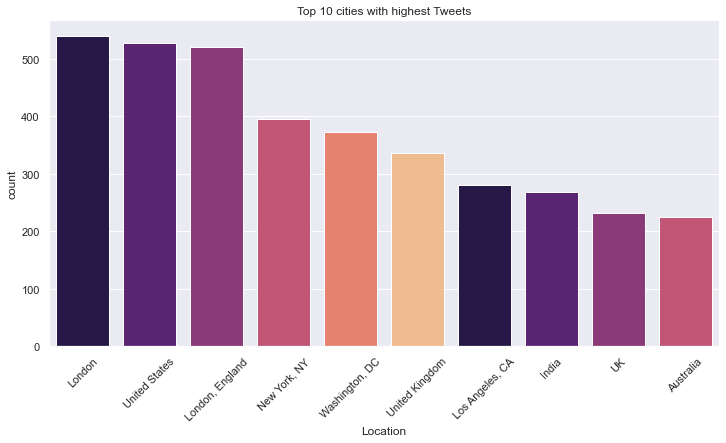

In [10]:
palette=sns.color_palette('magma')
sns.set(palette=palette)
plt.figure(figsize=(12,6))
plt.title('Top 10 cities with highest Tweets')
countries =sns.countplot(x='Location', data=train_df, order=train_df['Location'].value_counts().index[:10], palette=palette)
countries.set_xticklabels(countries.get_xticklabels(), rotation=45)
plt.show() 

In [11]:
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [12]:
'''
from wordcloud import WordCloud
for label, cmap in zip(['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative'],
                       ['winter', 'autumn', 'magma', 'viridis', 'plasma']):
    text = train_df.query('Sentiment == @label')['OriginalTweet'].str.cat(sep=' ')
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Messages", size=20)
    plt.show()
    '''

'\nfrom wordcloud import WordCloud\nfor label, cmap in zip([\'Positive\', \'Negative\', \'Neutral\', \'Extremely Positive\', \'Extremely Negative\'],\n                       [\'winter\', \'autumn\', \'magma\', \'viridis\', \'plasma\']):\n    text = train_df.query(\'Sentiment == @label\')[\'OriginalTweet\'].str.cat(sep=\' \')\n    plt.figure(figsize=(10, 6))\n    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)\n    wc.generate_from_text(text)\n    plt.imshow(wc)\n    plt.axis("off")\n    plt.title(f"Words Commonly Used in ${label}$ Messages", size=20)\n    plt.show()\n    '

## a) Extract lexicon-based features. Describe whether there is any lexicon-based feature that has some level of relation to the sentiment. Explain your reasoning.

In [13]:
afinn_lexicon = lbsa.get_lexicon('opinion', language='english', source='afinn')
nrc_lexicon = lbsa.get_lexicon('opinion', language='english', source='nrc')
nrc_sa_lexicon = lbsa.get_lexicon('sa', language='english', source='nrc')
mpqa_lexicon = lbsa.get_lexicon('opinion', language='english', source='mpqa')

sa_extractor = lbsa.FeatureExtractor(afinn_lexicon, nrc_lexicon, nrc_sa_lexicon, mpqa_lexicon)
feat_dat_train = pd.DataFrame(sa_extractor.process(train_df['OriginalTweet']),columns=sa_extractor.feature_names)
feat_dat_test = pd.DataFrame(sa_extractor.process(test_df['OriginalTweet']),columns=sa_extractor.feature_names)

## Apply Data Preprocessing onto also the test_df 

In [14]:
train_df["Sentiment"] = train_df["Sentiment"].map({'Extremely Negative':"Negative",'Negative':"Negative",'Neutral':"Neutral",'Positive':"Positive",'Extremely Positive': "Positive"})
test_df["Sentiment"] = test_df["Sentiment"].map({'Extremely Negative':"Negative",'Negative':"Negative",'Neutral':"Neutral",'Positive':"Positive",'Extremely Positive': "Positive"})

In [15]:
def show_dist(df, col):
    print('Descriptive stats for {}'.format(col))
    print('-'*(len(col)+22))
    print(df.groupby('Sentiment')[col].describe())
    bins = np.arange(df[col].min(), df[col].max() + 1)
    g = sns.FacetGrid(df, col='Sentiment', height=5, hue='Sentiment', palette="PuBuGn_d")
    g = g.map(sns.distplot, col, kde=False, norm_hist=True, bins=bins)
    plt.show()

df_eda_train = pd.concat([train_df,feat_dat_train],axis=1)
df_eda_test = pd.concat([test_df,feat_dat_test],axis=1)

## b) Clean the text. Describe each step that you went through and explain why those steps are needed. (Perform at least 5 steps)

## Step 3: Cleaning the text - a traditional approach

Text cleaning often includes following steps
- lowercasing
- removal of punctuations, question and exclamation marks
- removal of urls
- removal of digits
- removal of stopwords
- apply stemming (e.g., PorterStemmer) or lemmatization
(https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

import re, string, os, emoji

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

class CleanText(BaseEstimator, TransformerMixin):
   
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        return input_text.replace('_','')
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)

    def remove_digits(self, input_text):
        return re.sub(r'\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def remove_stopwords(self, input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
    def stemming(self, input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.emoji_oneword).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_stopwords).apply(self.stemming)
        return clean_X

In [17]:
ct = CleanText()
sent_clean = ct.fit_transform(train_df.OriginalTweet)
print(sent_clean.sample(5))
empty_clean = sent_clean == ''
print('{} records have no words left after text cleaning'.format(sent_clean[empty_clean].count()))
sent_clean.loc[empty_clean] = '[no_text]'

15103    amaz lowest price offer supermarket avail barw...
11294    cv health releas covid resourc aetna member dr...
12742    use wipe mask glove not dispos shop cart leav ...
9187     tilfurthernotic price paint suggest price no r...
23837    china also stole patent sister drug remdesivir...
Name: OriginalTweet, dtype: object
34 records have no words left after text cleaning


In [18]:
sent_clean_test = ct.transform(test_df.OriginalTweet)
empty_clean_test = sent_clean_test == ''
print('{} records have no words left after text cleaning'.format(sent_clean_test[empty_clean_test].count()))
sent_clean_test.loc[empty_clean_test] = '[no_text]'

2 records have no words left after text cleaning


## c) Create BOW representation of the data. Identify the most common words and visualize. Discuss whether the result is reasonable.

C:\Users\llmkh\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


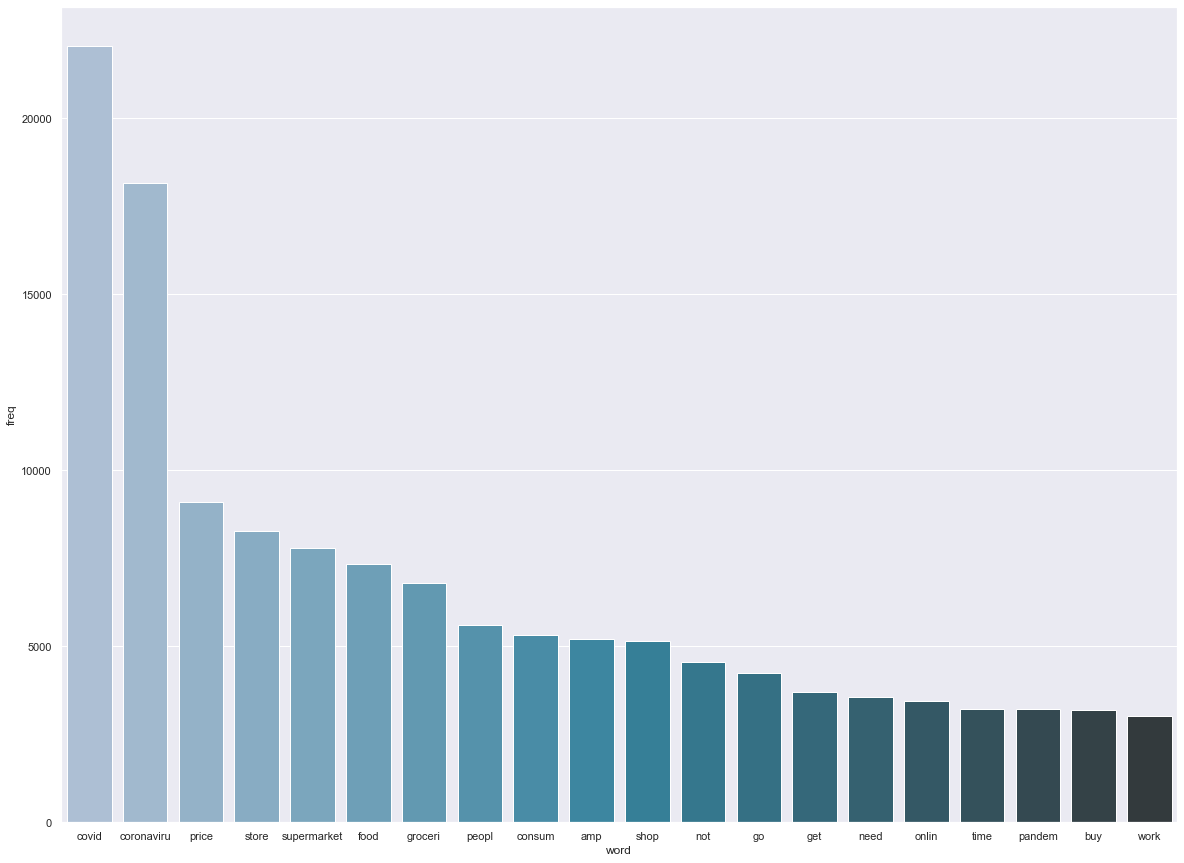

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import collections

cv = CountVectorizer()
bow = cv.fit_transform(sent_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(20, 15))
bar_freq_word = sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

In [21]:
df_model = df_eda_train
df_model['clean_text'] = sent_clean
#df_model.columns.tolist()

Descriptive stats for afinn_positive
------------------------------------
             count      mean       std  min  25%  50%  75%   max
Sentiment                                                       
Negative   15398.0  0.843616  1.343741  0.0  0.0  0.0  2.0  15.0
Neutral     7713.0  0.274861  0.961074  0.0  0.0  0.0  0.0  14.0
Positive   18046.0  2.855370  2.343069  0.0  1.0  2.0  4.0  29.0


C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

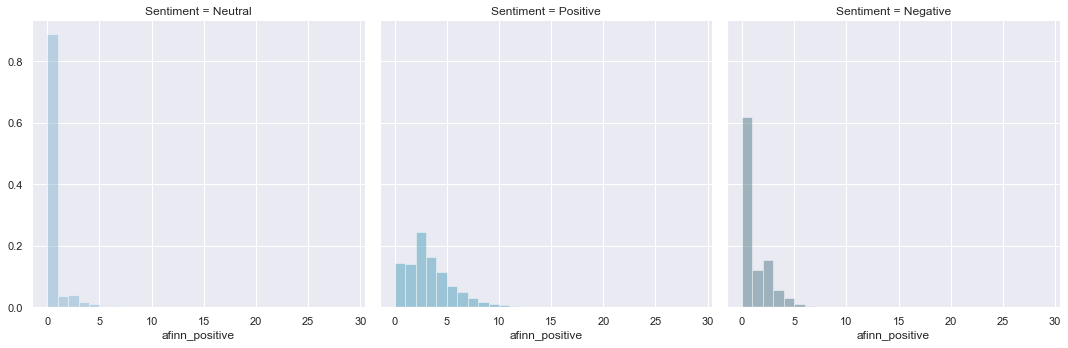

Descriptive stats for afinn_negative
------------------------------------
             count      mean       std  min  25%  50%  75%   max
Sentiment                                                       
Negative   15398.0  3.706001  2.833911  0.0  2.0  3.0  5.0  34.0
Neutral     7713.0  0.331000  1.036544  0.0  0.0  0.0  0.0  12.0
Positive   18046.0  0.944309  1.484025  0.0  0.0  0.0  2.0  14.0


C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

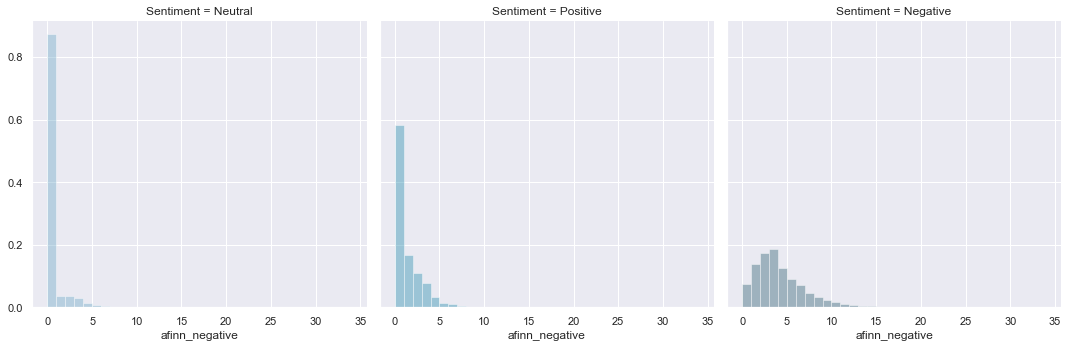

Descriptive stats for nrc_positive
----------------------------------
             count      mean       std  min  25%  50%  75%   max
Sentiment                                                       
Negative   15398.0  1.601442  1.404237  0.0  1.0  1.0  2.0   9.0
Neutral     7713.0  1.110852  1.208020  0.0  0.0  1.0  2.0   9.0
Positive   18046.0  2.132883  1.572191  0.0  1.0  2.0  3.0  11.0


C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

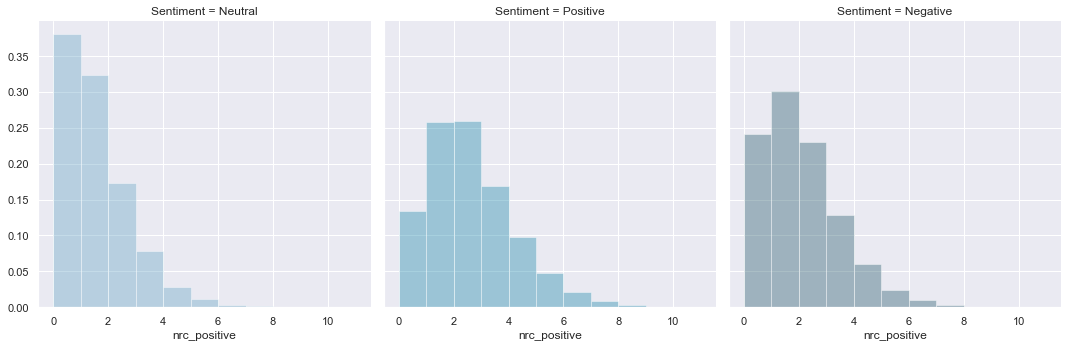

Descriptive stats for nrc_negative
----------------------------------
             count      mean       std  min  25%  50%  75%  max
Sentiment                                                      
Negative   15398.0  1.756137  1.322889  0.0  1.0  2.0  2.0  9.0
Neutral     7713.0  0.498898  0.787796  0.0  0.0  0.0  1.0  7.0
Positive   18046.0  0.810096  0.977729  0.0  0.0  1.0  1.0  9.0


C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

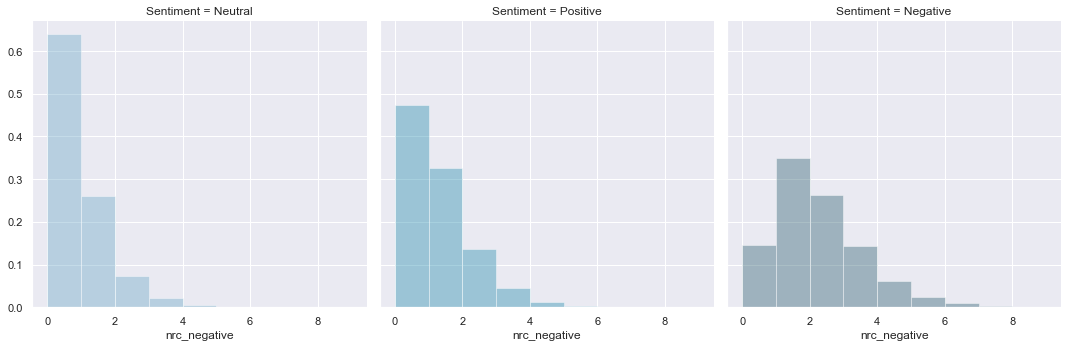

Descriptive stats for nrc_anger
-------------------------------
             count      mean       std  min  25%  50%  75%  max
Sentiment                                                      
Negative   15398.0  0.617678  0.805106  0.0  0.0  0.0  1.0  7.0
Neutral     7713.0  0.126540  0.388585  0.0  0.0  0.0  0.0  4.0
Positive   18046.0  0.266763  0.537731  0.0  0.0  0.0  0.0  5.0


C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

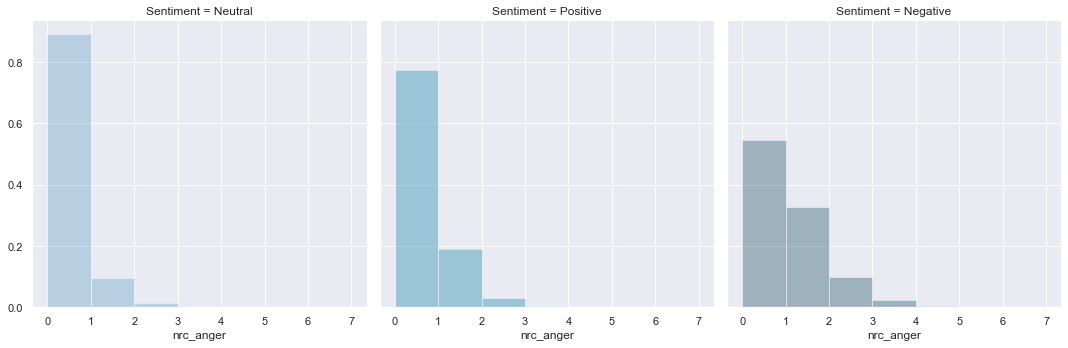

Descriptive stats for nrc_anticipation
--------------------------------------
             count      mean       std  min  25%  50%  75%  max
Sentiment                                                      
Negative   15398.0  0.822380  0.952779  0.0  0.0  1.0  1.0  6.0
Neutral     7713.0  0.628420  0.829238  0.0  0.0  0.0  1.0  7.0
Positive   18046.0  1.018674  1.050214  0.0  0.0  1.0  2.0  8.0


C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

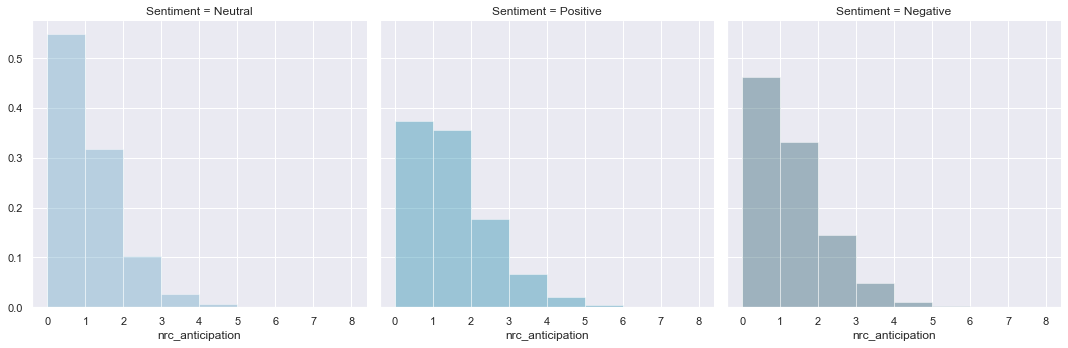

Descriptive stats for nrc_disgust
---------------------------------
             count      mean       std  min  25%  50%  75%  max
Sentiment                                                      
Negative   15398.0  0.410443  0.692138  0.0  0.0  0.0  1.0  5.0
Neutral     7713.0  0.111759  0.353125  0.0  0.0  0.0  0.0  4.0
Positive   18046.0  0.165300  0.437752  0.0  0.0  0.0  0.0  5.0


C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

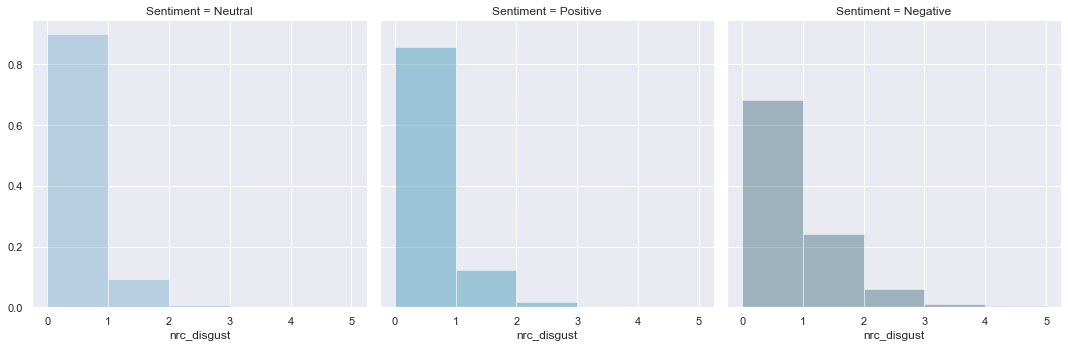

Descriptive stats for nrc_fear
------------------------------
             count      mean       std  min  25%  50%  75%  max
Sentiment                                                      
Negative   15398.0  1.005390  1.028482  0.0  0.0  1.0  2.0  7.0
Neutral     7713.0  0.329314  0.631300  0.0  0.0  0.0  1.0  5.0
Positive   18046.0  0.508755  0.765280  0.0  0.0  0.0  1.0  7.0


C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

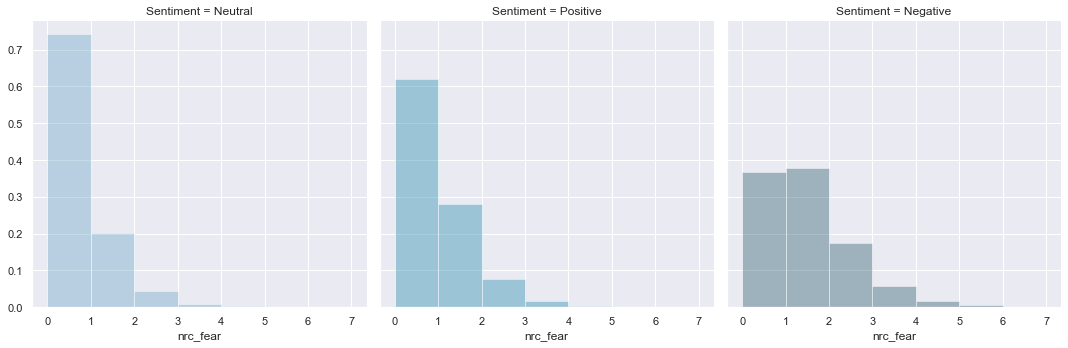

Descriptive stats for nrc_joy
-----------------------------
             count      mean       std  min  25%  50%  75%  max
Sentiment                                                      
Negative   15398.0  0.564229  0.796008  0.0  0.0  0.0  1.0  6.0
Neutral     7713.0  0.344483  0.634391  0.0  0.0  0.0  1.0  6.0
Positive   18046.0  0.804500  0.953571  0.0  0.0  1.0  1.0  7.0


C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

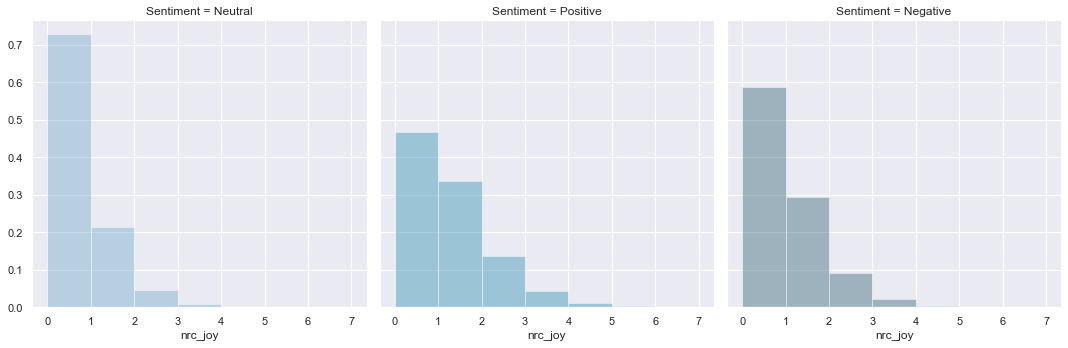

Descriptive stats for nrc_sadness
---------------------------------
             count      mean       std  min  25%  50%  75%  max
Sentiment                                                      
Negative   15398.0  0.701520  0.886645  0.0  0.0  0.0  1.0  6.0
Neutral     7713.0  0.212109  0.494129  0.0  0.0  0.0  0.0  4.0
Positive   18046.0  0.331985  0.602851  0.0  0.0  0.0  1.0  5.0


C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

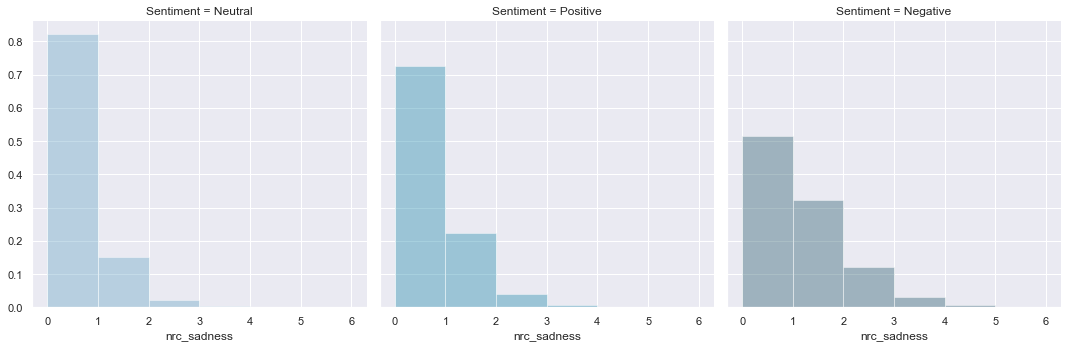

Descriptive stats for nrc_surprise
----------------------------------
             count      mean       std  min  25%  50%  75%  max
Sentiment                                                      
Negative   15398.0  0.334459  0.598299  0.0  0.0  0.0  1.0  5.0
Neutral     7713.0  0.217425  0.491417  0.0  0.0  0.0  0.0  5.0
Positive   18046.0  0.378145  0.639234  0.0  0.0  0.0  1.0  7.0


C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

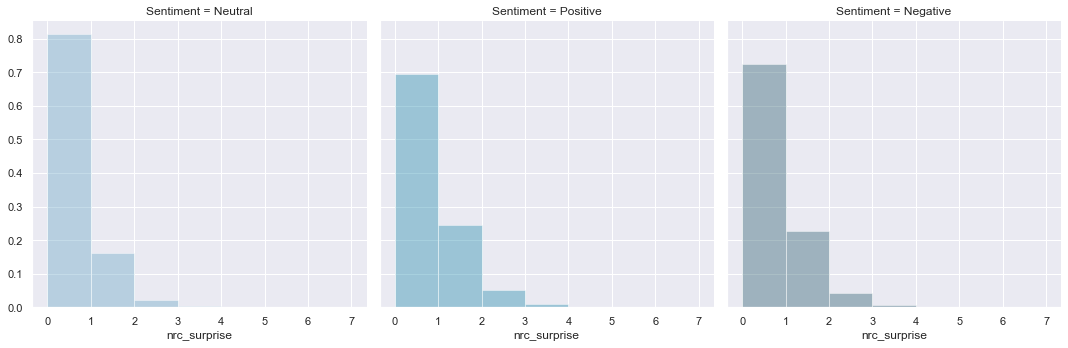

Descriptive stats for nrc_trust
-------------------------------
             count      mean       std  min  25%  50%  75%  max
Sentiment                                                      
Negative   15398.0  0.976036  1.088419  0.0  0.0  1.0  2.0  8.0
Neutral     7713.0  0.614288  0.879214  0.0  0.0  0.0  1.0  8.0
Positive   18046.0  1.208689  1.186375  0.0  0.0  1.0  2.0  8.0


C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

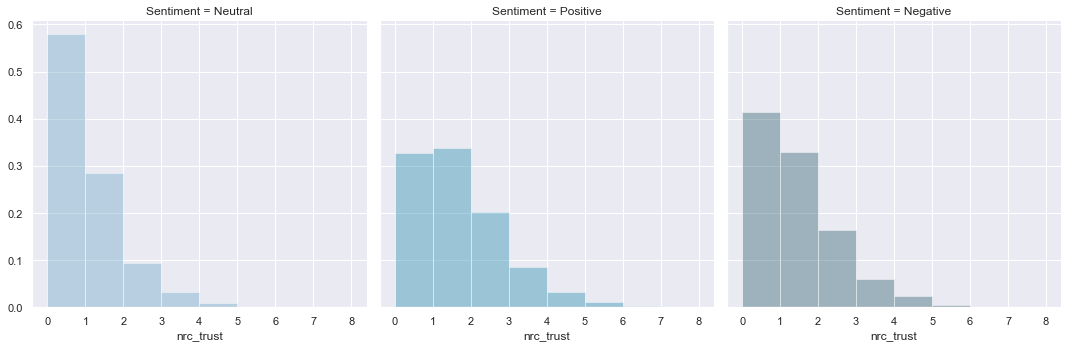

Descriptive stats for mpqa_positive
-----------------------------------
             count      mean       std  min  25%  50%  75%   max
Sentiment                                                       
Negative   15398.0  1.185803  1.192936  0.0  0.0  1.0  2.0   8.0
Neutral     7713.0  0.640736  0.956624  0.0  0.0  0.0  1.0   7.0
Positive   18046.0  2.111604  1.498225  0.0  1.0  2.0  3.0  11.0


C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

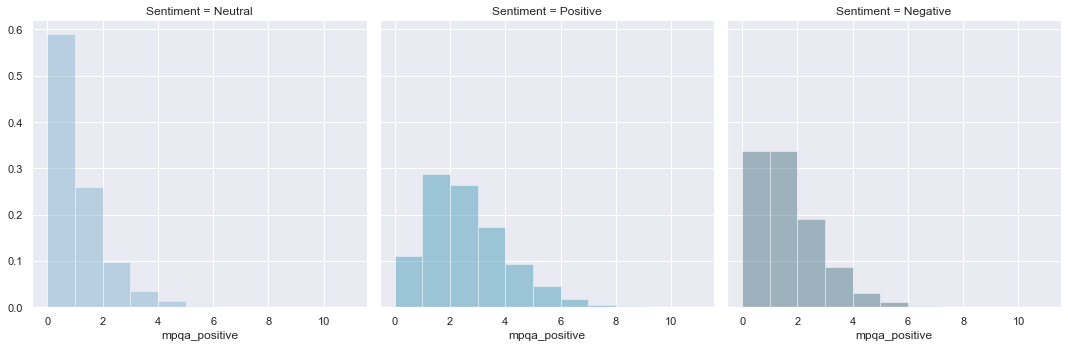

Descriptive stats for mpqa_negative
-----------------------------------
             count      mean       std  min  25%  50%  75%   max
Sentiment                                                       
Negative   15398.0  1.821925  1.373719  0.0  1.0  2.0  3.0  11.0
Neutral     7713.0  0.467782  0.811152  0.0  0.0  0.0  1.0   8.0
Positive   18046.0  0.822842  0.988900  0.0  0.0  1.0  1.0   9.0


C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

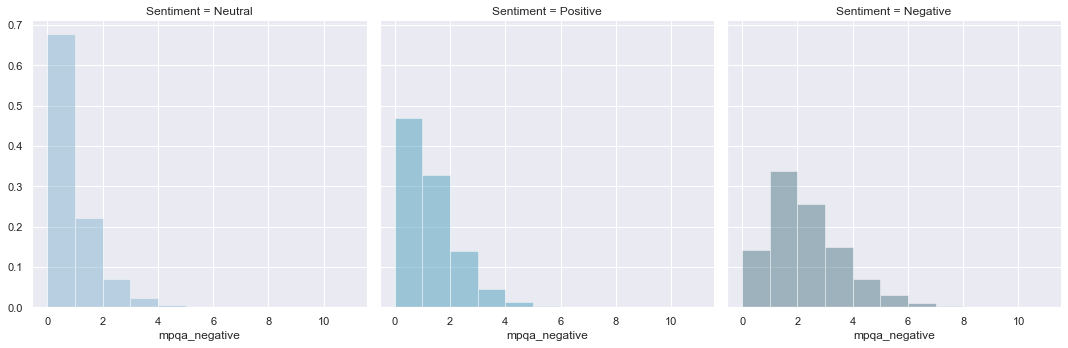

Descriptive stats for mpqa_strong_subjectivty
---------------------------------------------
             count      mean       std  min  25%  50%  75%   max
Sentiment                                                       
Negative   15398.0  1.664047  1.486645  0.0  1.0  1.0  2.0  11.0
Neutral     7713.0  0.598211  0.949848  0.0  0.0  0.0  1.0   8.0
Positive   18046.0  1.566275  1.405255  0.0  1.0  1.0  2.0  12.0


C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\llmkh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

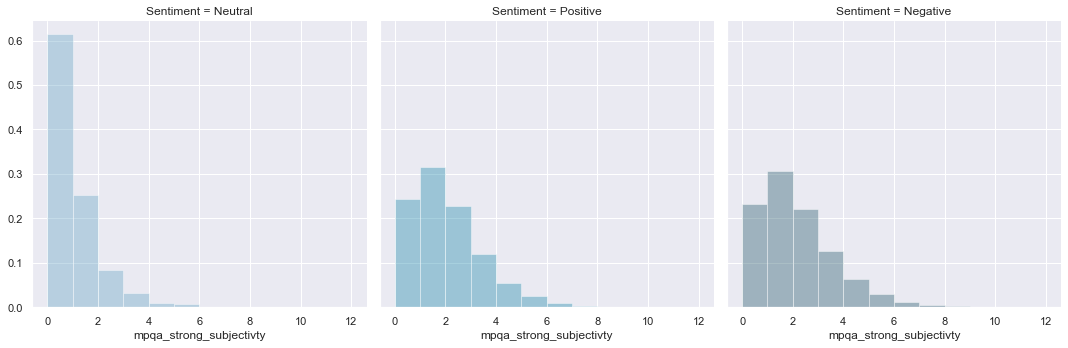

In [23]:
for feature in sa_extractor.feature_names:
    show_dist(df_eda_train, feature)

In [22]:
test_df["clean_text"] = sent_clean_test

In [23]:
class ColumnExtractor(TransformerMixin, BaseEstimator):
    def __init__(self, cols):
        self.cols = cols

    def transform(self, X, **transform_params):
        return X[self.cols]

    def fit(self, X, y=None, **fit_params):
        return self

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df_model.drop('Sentiment', axis=1), df_model.Sentiment, test_size=0.1, random_state=30)

In [25]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

mnb = MultinomialNB()
logreg = LogisticRegression(max_iter=10000, solver='saga')
countvect = CountVectorizer()

## d) Discuss at least two other types of representations than the BOW(or 1-hot encoding) in terms of their principles and the areas of applications. Bonus point: Implement one of them with python code and present the result. (4 points + 4 bonus points)

2 other types of representations: 
- TF-IDF
- Word embedding: 

In [26]:
print("First sentence:", df_model.head(3).OriginalTweet[1])
print()
print("Second sentence:", df_model.head(3).OriginalTweet[2])

First sentence: advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order

Second sentence: Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P


In [27]:
corpus = df_model.head(3).clean_text.tolist()
corpus

['[no_text]',
 'advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med not order',
 'coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak']

In [28]:
first = df_model.head(3).clean_text.tolist()[1]
second = df_model.head(3).clean_text.tolist()[2]

#split so each word have their own string
first = first.split(" ")
second= second.split(" ")

#join them to remove common duplicate words
total= set(first).union(set(second))

print(total)

#Now lets add a way to count the words using a dictionary key-value pairing for both sentences
wordDictA = dict.fromkeys(total, 0) 
wordDictB = dict.fromkeys(total, 0)
for word in first:
    wordDictA[word]+=1
    
for word in second:
    wordDictB[word]+=1
#put them in a dataframe and then view the result:
pd.DataFrame([wordDictA, wordDictB])

{'chemist', 'list', 'not', 'dedic', 'onlin', 'give', 'regular', 'outbreak', 'employ', 'neighbour', 'covid', 'gp', 'creat', 'woolworth', 'shop', 'australia', 'poss', 'order', 'hour', 'account', 'suppli', 'advic', 'famili', 'coronaviru', 'disabl', 'elderli', 'adequ', 'set', 'contact', 'med', 'number', 'phone', 'amid', 'talk', 'exchang', 'school'}


,chemist,list,not,dedic,onlin,give,regular,outbreak,employ,neighbour,...,adequ,set,contact,med,number,phone,amid,talk,exchang,school
0,1,1,1,0,1,0,1,0,1,2,...,1,1,1,1,2,2,0,1,1,1
1,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
#Now writing the TF function:
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict
#running our sentences through the tf function:
tfFirst = computeTF(wordDictA, first)
tfSecond = computeTF(wordDictB, second)
#Converting to dataframe for visualization
tf_df= pd.DataFrame([tfFirst, tfSecond])

tf_df

,chemist,list,not,dedic,onlin,give,regular,outbreak,employ,neighbour,...,adequ,set,contact,med,number,phone,amid,talk,exchang,school
0,0.035714,0.035714,0.035714,0.000000,0.035714,0.000000,0.035714,0.000000,0.035714,0.071429,...,0.035714,0.035714,0.035714,0.035714,0.071429,0.071429,0.000000,0.035714,0.035714,0.035714
1,0.000000,0.000000,0.000000,0.083333,0.000000,0.083333,0.000000,0.083333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000


In [30]:
#creating the log portion of the Excel table we saw earlier
def computeIDF(docList):
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
        
    return idfDict
#inputing our sentences in the log file
idfs = computeIDF([wordDictA, wordDictB])
#The actual calculation of TF*IDF from the table above:
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf
#running our two sentences through the IDF:
idfFirst = computeTFIDF(tfFirst, idfs)
idfSecond = computeTFIDF(tfSecond, idfs)
#putting it in a dataframe
idf= pd.DataFrame([idfFirst, idfSecond])

## e) Train classifiers. Describe the process in two sections, one for the methods and the other for the results.

In [31]:
from pprint import pprint
from time import time

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

def grid_vect(clf, parameters_clf, X_train, X_test, y_train, y_test, parameters_text=None, vect=None):
    
    textcountscols = ['afinn_positive', 'afinn_negative', 'nrc_positive', 'nrc_negative', 'nrc_anger', 'nrc_anticipation', 'nrc_disgust',
                     'nrc_fear', 'nrc_joy', 'nrc_sadness', 'nrc_surprise', 'nrc_trust', 'mpqa_positive', 'mpqa_negative', 'mpqa_strong_subjectivty']
    
    features = FeatureUnion([('textcounts', ColumnExtractor(cols=textcountscols))
                                 , ('pipe', Pipeline([('cleantext', ColumnExtractor(cols='clean_text')), ('vect', vect)]))]
                                , n_jobs=-1)
  
    pipeline = Pipeline([
        ('features', features)
        , ('clf', clf)
    ])
    
    # Join the parameters dictionaries together
    parameters = dict()
    if parameters_text:
        parameters.update(parameters_text)
    parameters.update(parameters_clf)

    # Make sure you have scikit-learn version 0.19 or higher to use multiple scoring metrics
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=5)
    
    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)

    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best CV score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        
    print("Test score with best_estimator_: %0.3f" % grid_search.best_estimator_.score(X_test, y_test))
    print("\n")
    print("Classification Report Test Data")
    print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))
                        
    return grid_search

In [32]:
# Parameter grid settings for the vectorizers (Count and TFIDF)
parameters_vect = {
    'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
    'features__pipe__vect__ngram_range': ((1, 1), (1, 2)),
    'features__pipe__vect__min_df': (1,2)
}

# Parameter grid settings for LogisticRegression
parameters_logreg = {
    'clf__C': (0.25, 0.5, 1.0),
    'clf__penalty': ('l1', 'l2')
}

# Parameter grid settings for MultinomialNB
parameters_mnb = {
    'clf__alpha': (0.25, 0.5, 0.75)
}


In [33]:
y_train.value_counts()

Positive    16233
Negative    13907
Neutral      6901
Name: Sentiment, dtype: int64

In [34]:
y_valid.value_counts()

Positive    1813
Negative    1491
Neutral      812
Name: Sentiment, dtype: int64

In [41]:
textcountscols = ['afinn_positive', 'afinn_negative', 'nrc_positive', 'nrc_negative', 'nrc_anger', 'nrc_anticipation', 'nrc_disgust',
                     'nrc_fear', 'nrc_joy', 'nrc_sadness', 'nrc_surprise', 'nrc_trust', 'mpqa_positive', 'mpqa_negative', 'mpqa_strong_subjectivty']
    
features = FeatureUnion([('textcounts', ColumnExtractor(cols=textcountscols))
                             , ('pipe', Pipeline([('cleantext', ColumnExtractor(cols='clean_text')), ('vect', countvect)]))]
                            , n_jobs=-1)

pipeline = Pipeline([
    ('features', features)
    , ('clf', logreg)
])

In [42]:
pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_valid)
print(classification_report(y_valid, y_test_pred))

Pipeline(steps=[('features',
                 FeatureUnion(n_jobs=-1,
                              transformer_list=[('textcounts',
                                                 ColumnExtractor(cols=['afinn_positive',
                                                                       'afinn_negative',
                                                                       'nrc_positive',
                                                                       'nrc_negative',
                                                                       'nrc_anger',
                                                                       'nrc_anticipation',
                                                                       'nrc_disgust',
                                                                       'nrc_fear',
                                                                       'nrc_joy',
                                                                       'nrc_sadness',
   

In [47]:
pipeline_naive = Pipeline([
    ('features', features)
    , ('clf', mnb)
])
pipeline_naive.fit(X_train, y_train)

y_test_pred = pipeline_naive.predict(X_valid)
print(classification_report(y_valid, y_test_pred))

In [ ]:
# LogisticRegression
best_logreg_countvect = grid_vect(logreg, parameters_logreg, X_train, X_valid, y_train, y_valid, parameters_text=parameters_vect, vect=countvect)

Performing grid search...
pipeline: ['features', 'clf']
parameters:
{'clf__C': (0.25, 0.5, 1.0),
 'clf__penalty': ('l1', 'l2'),
 'features__pipe__vect__max_df': (0.25, 0.5, 0.75),
 'features__pipe__vect__min_df': (1, 2),
 'features__pipe__vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [ ]:
smnb = MultinomialNB()
countvect = CountVectorizer()

# MultinomialNB
best_mnb_countvect = grid_vect(mnb, parameters_mnb, X_train, X_test, y_train, y_test, parameters_text=parameters_vect, vect=countvect)

## BERT

In [41]:
#general purpose packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
import re, string
import emoji
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

#keras
import tensorflow as tf
from tensorflow import keras


#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#set seed for reproducibility
seed=42

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

<Figure size 432x288 with 0 Axes>

### Import the BERT tokenizer

In [43]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

'''
token_lens = []

for txt in df['text_clean'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    
max_len=np.max(token_lens)
'''

## Class Balancing by RandomOverSampler

In [46]:
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(np.array(X_train['clean_text']).reshape(-1, 1), np.array(y_train).reshape(-1, 1));
#train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text_clean', 'Sentiment']);

In [47]:
X_valid, y_valid = ros.fit_resample(np.array(X_valid['clean_text']).reshape(-1, 1), np.array(y_valid).reshape(-1, 1));

## Train- Validation split

In [52]:
y_test = test_df.Sentiment

In [53]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [54]:
print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {test_df.shape[0]}" )

TRAINING DATA: 48699
VALIDATION DATA: 5439
TESTING DATA: 3798


## BERT Sentiment Analysis

In [55]:
MAX_LEN=128

In [56]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [57]:
train_input_ids, train_attention_masks = tokenize(pd.DataFrame(X_train,columns=["clean_text"]).clean_text.tolist(), MAX_LEN)
val_input_ids, val_attention_masks = tokenize(pd.DataFrame(X_valid,columns=["clean_text"]).clean_text.tolist(), MAX_LEN)
test_input_ids, test_attention_masks = tokenize(pd.DataFrame(test_df, columns=["clean_text"]).clean_text.tolist(), MAX_LEN)

In [59]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [60]:
def create_model(bert_model, max_len=MAX_LEN):
    
    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    embeddings = bert_model([input_ids,attention_masks])[1]
    
    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    
    model.compile(opt, loss=loss, metrics=accuracy)
    
    
    return model

In [54]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [60]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=5, batch_size=16)

Epoch 1/5
2316/2316 [==============================] - 1021s 441ms/step - loss: 0.5523 - categorical_accuracy: 0.7848 - val_loss: 0.4593 - val_categorical_accuracy: 0.8292
Epoch 2/5
2316/2316 [==============================] - 1013s 437ms/step - loss: 0.3749 - categorical_accuracy: 0.8648 - val_loss: 0.4089 - val_categorical_accuracy: 0.8525
Epoch 3/5
2316/2316 [==============================] - 1005s 434ms/step - loss: 0.2823 - categorical_accuracy: 0.9029 - val_loss: 0.4113 - val_categorical_accuracy: 0.8637
Epoch 4/5
2316/2316 [==============================] - 1002s 433ms/step - loss: 0.2106 - categorical_accuracy: 0.9269 - val_loss: 0.4144 - val_categorical_accuracy: 0.8654
Epoch 5/5
2316/2316 [==============================] - 1001s 432ms/step - loss: 0.1536 - categorical_accuracy: 0.9478 - val_loss: 0.4971 - val_categorical_accuracy: 0.8586


In [61]:
result_bert = model.predict([test_input_ids,test_attention_masks])

In [62]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

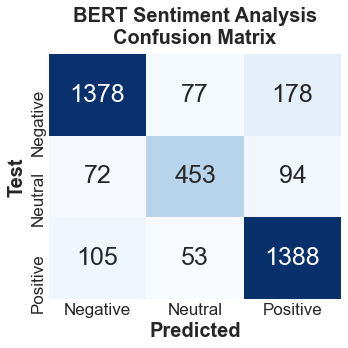

In [64]:
conf_matrix(y_test.argmax(1), y_pred_bert.argmax(1),'BERT Sentiment Analysis\nConfusion Matrix')

In [65]:
print('\tClassification Report for BERT:\n\n',classification_report(y_test,y_pred_bert, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for BERT:

               precision    recall  f1-score   support

    Negative       0.89      0.84      0.86      1633
     Neutral       0.78      0.73      0.75       619
    Positive       0.84      0.90      0.87      1546

   micro avg       0.85      0.85      0.85      3798
   macro avg       0.83      0.82      0.83      3798
weighted avg       0.85      0.85      0.85      3798
 samples avg       0.85      0.85      0.85      3798

